# Towards Data Science website is the source
- https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [1]:
from scipy.integrate import quad

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gaussian PDF

In [16]:
m=0
stddev=1
x=np.linspace(-5,5,num=100)
k=1/(np.sqrt(2*np.pi)*stddev)
pdf=k*np.exp(-(x-m)**2/(2*stddev**2))

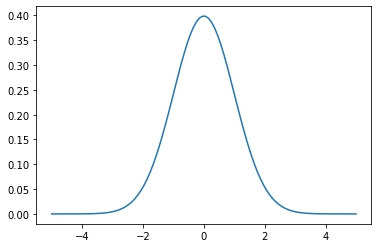

In [17]:
plt.plot(x,pdf)

# Integration of pdf to know the probability of random variable between the limits

In [33]:
#result1,_=quad(pdf,-0.6745,0.6745) -- can't be used like this directly
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
# Integrate PDF from -2.698 to 2.698
result_q1_3, _ = quad(normalProbabilityDensity,-0.6745*stddev,0.6745*stddev,limit = 1000) # Requires function object as parameter not numpy so pdf can't be used directly
print(result_q1_3)#50%

0.5000065142726018


In [34]:
result_qmax_min, _ = quad(normalProbabilityDensity,-2.698*stddev,2.698*stddev,limit = 1000) # Requires function object as parameter not numpy so pdf can't be used directly
print(result_qmax_min)

0.9930242559336101


# BoxPlot using Seaborn

In [38]:
import seaborn as sns
import pandas as pd

In [42]:
df=pd.read_csv("./dataset_tumor_m_b.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


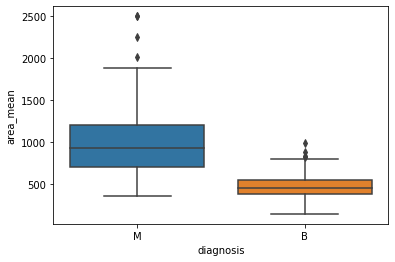

In [44]:
sns.boxplot(x='diagnosis',y='area_mean',data=df) #give the column names to x and y respectively.

# Boxplot using matplotlib.pyplot

{'whiskers': [<matplotlib.lines.Line2D at 0x24dbb10cda0>,
 'caps': [<matplotlib.lines.Line2D at 0x24db3590278>,
 'boxes': [<matplotlib.lines.Line2D at 0x24dbaed16d8>,
 'medians': [<matplotlib.lines.Line2D at 0x24dbb10d908>,
 'fliers': [<matplotlib.lines.Line2D at 0x24dbb10d8d0>,
 'means': []}

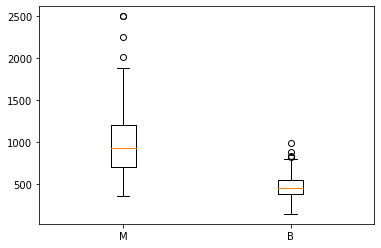

In [58]:
malignant=df[df['diagnosis']=='M']['area_mean']
benign=df[df['diagnosis']=='B']['area_mean']
plt.boxplot([malignant,benign],labels=['M','B'])

# Boxplot using Pandas

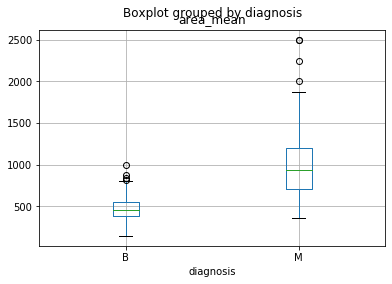

In [59]:
df.boxplot(column='area_mean',by='diagnosis')